In [118]:
import pandas as pd
import argparse
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr


In [164]:
def read_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    return df

def normalize_scores(df, score_columns):
    for col in score_columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

def calculate_correlations(df, score_columns):
    pearson_corr = df[score_columns].corr(method='pearson')
    spearman_corr = df[score_columns].corr(method='spearman')
    return pearson_corr, spearman_corr

def remove_score_substring(df, score_columns):
    new_columns = [col.replace('_score', '') for col in score_columns]
    df.rename(columns=dict(zip(score_columns, new_columns)), inplace=True)
    return df, new_columns

In [211]:
def plot_heatmap(corr_matrix, title, output_file):
    corr_matrix.columns = [col.replace('_score', '') for col in corr_matrix.columns]
    corr_matrix.index = [idx.replace('_score', '') for idx in corr_matrix.index]

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_matrix, mask=mask, annot=True, center=0, linewidths=.5, square=True, vmin=0, vmax=1, fmt='.2f', cmap='coolwarm',
                cbar_kws={"shrink": 1, "aspect": 30, "pad": 0.02},
                annot_kws={"size": 16})

    # Set the font size of the color bar labels
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)

    plt.title(title, fontsize=20)
    plt.xticks(fontsize=16, rotation=30, ha='right')
    plt.yticks(fontsize=16, rotation=0)
    
    fig.subplots_adjust(left=0.1, right=0.89, bottom=0.2)
    plt.tight_layout()
    if output_file.endswith(".pdf"):
        plt.savefig(output_file)
    else:
        plt.savefig(output_file, dpi=1200)
    plt.show()
    plt.close()

In [207]:
def plot_scatter_with_spearman(df, col1, col2, output_file, sample_size=5000):
    # Calculate Spearman correlation
    if len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=420)
    
    spearman_corr, _ = spearmanr(df[col1], df[col2])
    
    # Create scatter plot
    plt.figure(figsize=(5, 5))
    scatter = plt.scatter(df[col1], df[col2], c='grey', edgecolor='w', s=10, alpha=0.7)
    
    # Color dots based on their position relative to the lines
    colors = []
    for x, y in zip(df[col1], df[col2]):
        if y >= -x + 1.3:
            colors.append('darkgreen')
        elif y > -x + 1 and y < -x + 1.3 :
            colors.append('yellowgreen')
        else:
            colors.append('red')
    
    plt.scatter(df[col1], df[col2], c=colors, edgecolor='w', s=10, alpha=0.7)
    
    # Add dashed lines
    plt.plot([0, 1.3], [1.3, 0], linestyle='--', color='black', linewidth=2.5)
    plt.plot([0, 1], [1, 0], linestyle='--', color='black', linewidth=2.5)
    
    # Set axes limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.xticks([0,0.5,1],fontsize=12)
    plt.yticks([0,0.5,1],fontsize=12)
    
    # Add titles and labels
    #plt.title(f'(ρ = {spearman_corr:.2f})', fontsize=15)
    plt.title(f'Multivariate filter stringency', fontsize=16)
    plt.xlabel(col1, fontsize=16)
    plt.ylabel(col2, fontsize=16)
    
    # Save plot
    plt.tight_layout()
    if output_file.endswith(".pdf"):
        plt.savefig(output_file)
    else:
        plt.savefig(output_file, dpi=1200)
    plt.show()
    plt.close()

In [165]:
df = read_file("./all_scores/hg38/sgRNAs/merged_sgRNAs.bed")

# Identify score columns
score_columns = [col for col in df.columns if 'score' in col]

# Normalize scores
df = normalize_scores(df, score_columns)
df, score_columns = remove_score_substring(df, score_columns)

# Calculate correlations
pearson_corr, spearman_corr = calculate_correlations(df, score_columns)

print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

print("Correlation files saved.")

Pearson Correlation:
                Azimuth  CRISPRater  CRISPRscan  DeepHF_U6  DeepHF_T7  \
Azimuth       1.000000    0.114698    0.115220   0.636295   0.307410   
CRISPRater    0.114698    1.000000    0.233349   0.156398   0.265863   
CRISPRscan    0.115220    0.233349    1.000000   0.259246   0.638945   
DeepHF_U6     0.636295    0.156398    0.259246   1.000000   0.668096   
DeepHF_T7     0.307410    0.265863    0.638945   0.668096   1.000000   
DeepSpCas9    0.691530    0.179794    0.271921   0.776664   0.547905   
RuleSet1      0.558269    0.122043    0.032686   0.374669   0.129992   
RS3_Hsu2013   0.717858    0.226205    0.288739   0.808014   0.558721   
RS3_Chen2013  0.550414    0.142948    0.161888   0.605799   0.396774   

              DeepSpCas9  RuleSet1  RS3_Hsu2013  RS3_Chen2013  
Azimuth         0.691530  0.558269     0.717858      0.550414  
CRISPRater      0.179794  0.122043     0.226205      0.142948  
CRISPRscan      0.271921  0.032686     0.288739      0.161888  
D

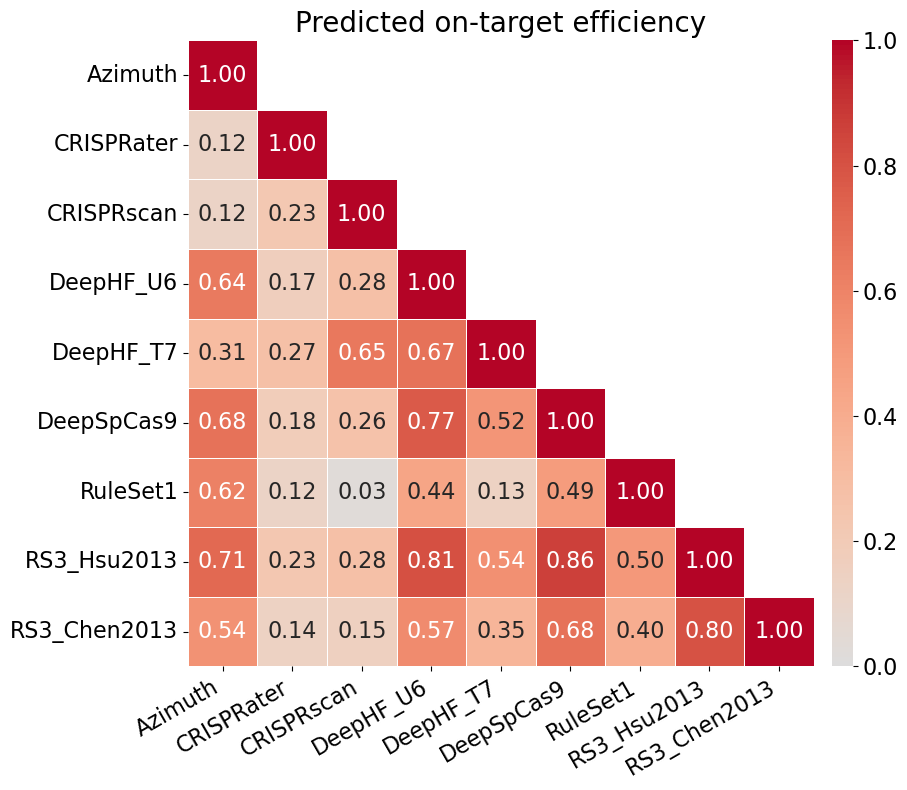

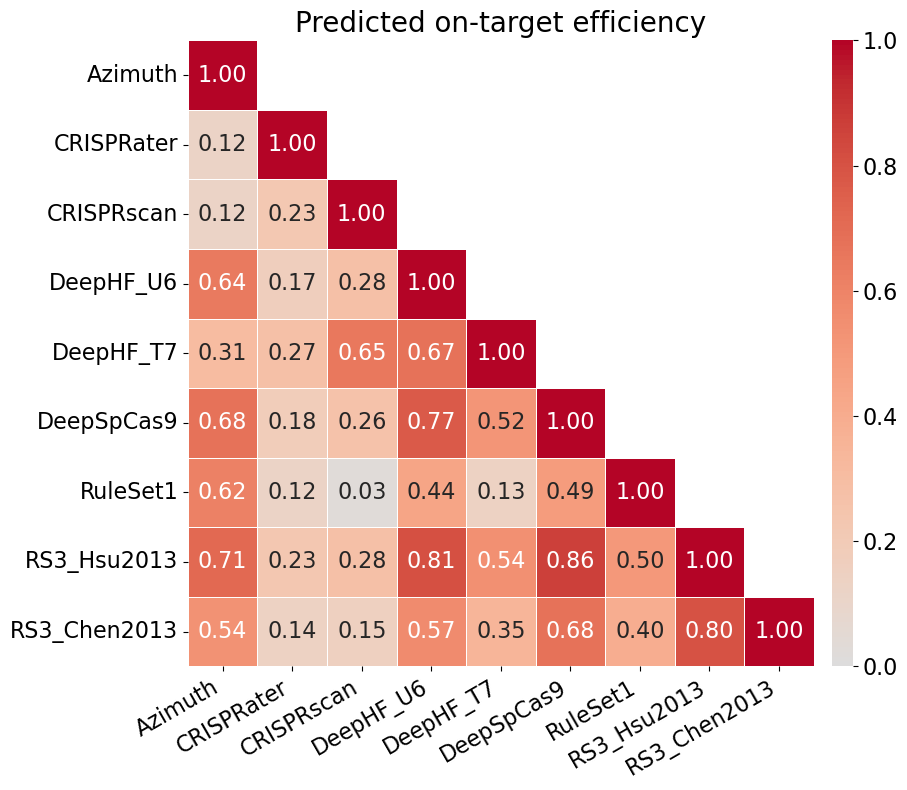

In [213]:
#plot_heatmap(pearson_corr, 'Pearson Correlation Heatmap', 'pearson_correlation_heatmap.png')
#plot_heatmap(spearman_corr, 'Spearman Correlation Heatmap', 'spearman_correlation_heatmap.png')
plot_heatmap(spearman_corr, 'Predicted on-target efficiency', 'spearman_correlation_heatmap.png')
plot_heatmap(spearman_corr, 'Predicted on-target efficiency', 'spearman_correlation_heatmap.pdf')

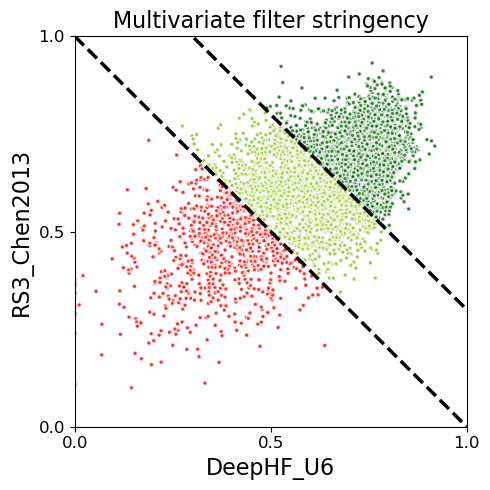

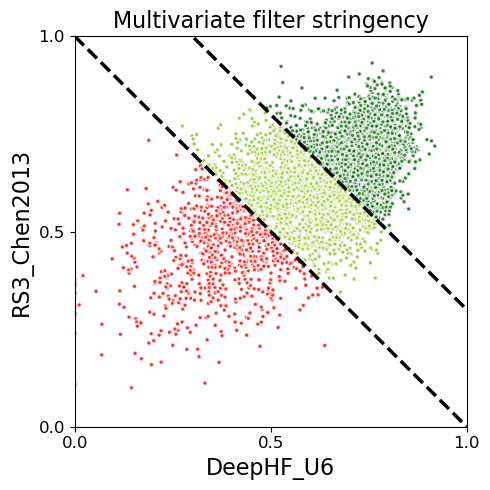

In [212]:
plot_scatter_with_spearman(df, col1="DeepHF_U6", col2="RS3_Chen2013", output_file="DeepSpCas9_vs_RS3_Hsu2013.png")
plot_scatter_with_spearman(df, col1="DeepHF_U6", col2="RS3_Chen2013", output_file="DeepSpCas9_vs_RS3_Hsu2013.pdf")